In [63]:
%pylab inline
import pandas as pd
import os
import scipy.stats

import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

# Paths
DATADIR="/storage/mgymrek/chipmunk/fig1_eval"
OUTDIR=os.path.join(DATADIR, "pdfs")

Populating the interactive namespace from numpy and matplotlib


# Fragment length distribution examples

## Figure 1B

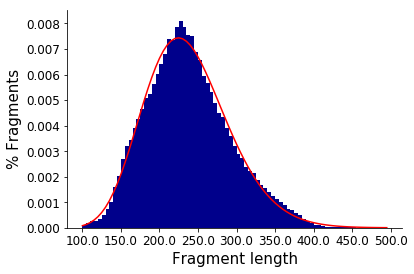

In [64]:
frags = [int(item.strip()) for item in open(os.path.join(DATADIR, "ENCFF545HSY.bam_200_577.frags.txt"), "r").readlines()]

mu = np.mean(frags)
v = np.var(frags)
shape = mu * mu / v
scale = v / mu
    
fig = plt.figure()
ax = fig.add_subplot(111)
bins = np.arange(100, 500, 5)
ax.hist(frags, bins=bins, normed=True, color="darkblue");
ax.plot(bins, scipy.stats.gamma(shape, 0, scale).pdf(bins), color='r');
ax.set_xlabel("Fragment length", size=15)
ax.set_ylabel("% Fragments", size=15)
ax.set_xticklabels(["%0.1f"%item for item in ax.get_xticks()], size=12)
ax.set_yticklabels(["%0.3f"%item for item in ax.get_yticks()], size=12);
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom');
fig.savefig(os.path.join(OUTDIR, "Fig1_Fraglen.pdf"))

## Figure 1E - bins

(0.6375929562143985, 0.0)
(0.8245228815117075, 0.0)


enc.counts    1091180
sim.counts    3682253
dtype: int64

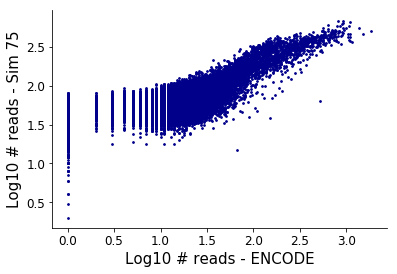

In [142]:
factor = "K562+SP1"
nc = 75
enc_bins = pd.read_csv(os.path.join(DATADIR, factor+".ENCODE.cov.1kb.bed"), usecols=[3], names=["enc.counts"], sep="\t")
sim_bins = pd.read_csv(os.path.join(DATADIR, factor+".%s.cov.1kb.bed"%nc), usecols=[3], names=["sim.counts"], sep="\t")
bindata = pd.DataFrame({"enc.counts": enc_bins["enc.counts"], "sim.counts": sim_bins["sim.counts"]})

bindata = bindata[bindata["enc.counts"]+bindata["sim.counts"]>0]

# remove outliers. kosher?
bindata = bindata[(bindata["sim.counts"]<5000) & (bindata["enc.counts"]<5000)]

fig = plt.figure()
ax = fig.add_subplot(111)
pc = 1
ax.scatter(np.log10(bindata["enc.counts"]+pc), np.log10(bindata["sim.counts"]+pc), s=3, color="darkblue");
ax.set_xlabel("Log10 # reads - ENCODE", size=15)
ax.set_ylabel("Log10 # reads - Sim %s"%nc, size=15)
ax.set_xticklabels(["%0.1f"%item for item in ax.get_xticks()], size=12)
ax.set_yticklabels(["%0.1f"%item for item in ax.get_yticks()], size=12);
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
print(scipy.stats.pearsonr(np.log10(bindata["enc.counts"]+pc), np.log10(bindata["sim.counts"]+pc)))
print(scipy.stats.pearsonr((bindata["enc.counts"]), (bindata["sim.counts"])))
bindata.apply(sum)

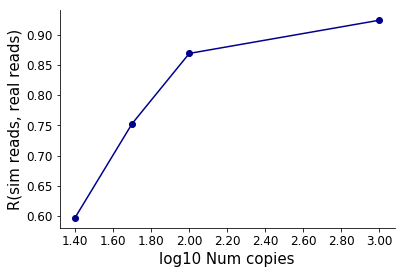

In [141]:
# get corr for different cell nums
enc_bins = pd.read_csv(os.path.join(DATADIR, factor+".ENCODE.cov.1kb.bed"), usecols=[3], names=["enc.counts"], sep="\t")

ncs = [25, 50, 100, 1000]
rvals = []
for nc in ncs:
    sim_bins = pd.read_csv(os.path.join(DATADIR, factor+".%s.cov.1kb.bed"%nc), usecols=[3], names=["sim.counts"], sep="\t")
    bindata = pd.DataFrame({"enc.counts": enc_bins["enc.counts"], "sim.counts": sim_bins["sim.counts"]})

    bindata = bindata[bindata["enc.counts"]+bindata["sim.counts"]>0]

    # remove outliers. kosher?
    bindata = bindata[(bindata["sim.counts"]<5000) & (bindata["enc.counts"]<5000)]

    r = scipy.stats.pearsonr((bindata["enc.counts"]), (bindata["sim.counts"]))[0]
    rvals.append(r)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(np.log10(ncs), rvals, color="darkblue", marker="o");
ax.set_xlabel("log10 Num copies", size=15)
ax.set_ylabel("R(sim reads, real reads)", size=15)
ax.set_xticklabels(["%0.2f"%item for item in ax.get_xticks()], size=12)
ax.set_yticklabels(["%0.2f"%item for item in ax.get_yticks()], size=12);
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
